# Convolutional Neural Nets

Mnist data sets are cool for a concept learning tool but they pose constraints that will render your model trained on them, useless. Life wouldn't be that simple, would it ?

## Limitations of DNNs
For example, each image in mnist data set is 28x28, greyscale and perfectly centered. Reality would be hell lot different. Size could be just about anything, coulours could be anything, image might be centered, scaled, zoomed or what not. 

![mnistFashionExample](img/mnist_fashion_example.png)

Our mnist trained DNN will fail miserably if we show it something like this:

![boot](img/boot.jpg)

Basically, we cannot rely on symmetry, order and predictability of mnist data set in the real world scenarios. So we have to come up with something smarter than this.

## Big question ?

So the question is what we can do about it. Maybe we should ask ourselves, what is a boot if we are classifying boots ?
What makes a boot, 'boot' ?
Ofcourse a computer does not see what a human sees. But can it somehow differentiate among some naked or hidden features of the object which would help to classify the object correctly ?

And the answer is, yes, use convolutional NNs dummy.

## Main idea

A convolution is basically a filter that when applied, processes the image and extract common features.  

Here is how it's done:

- Scan every pixel in the image and multiply it's neighbours with corresponding weights of the filter. 
- Add all the results of multiplications. 
- Assign this new value to the pixel.

For example here is an example of 3x3 convolution:

![convolution](img/convolution.png)

Note that there can be manny such filters defined in the network and the application of a filter results in a new image. So we should be mindful of the image size. We should use techniques to compress the image without losing feature information.

One such technique is called Pooling. There are many types of pooling. Here we can discuss about MAX Pooling which simply says:

- Divide the pixels into blocks of a given size 
- Find the maximum value of the block and use extract that out
- Reconstruct image with the given maxed out values

For example:

![pooling](img/pooling.png)

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

## Playing with ascent
Scipy lib provides some example images that we can play with to demonstrate the concept of Convolution. One such image is 'ascent', which shows stairwell. There are horizontal and vertical lines in it plus there are sharp angles. These sort of features can become handy for classification when extracted. 

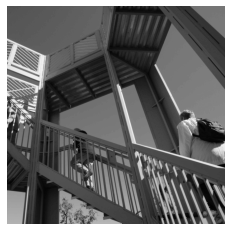

In [24]:
# load ascent image
img = misc.ascent()
# and here is how it looks
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(img)
plt.show()

In [25]:
# image is stored as an Numpy array
copy_img = np.copy(img)
size_x = copy_img.shape[0]
size_y = copy_img.shape[1]

print(f'size_x: {size_x}, size_y: {size_y}')

size_x: 512, size_y: 512


Let's define and play with some 3x3 filters now this filter is for sharp edges and straight lines. I don't understand yet why do we need to normalize filter values by multiplying it with a weight. 

In [26]:


filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# for having more fun, use the following filters
#filter = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
#filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
# change this weight if the sum of your filter value is not 0 or 1
# why the heck ?
weight = 1

Here is our Convolution: 
- loop over the image leaving one pixel worth of margin. 
- select one pixel at a time.
- multiply selected pixel's neighbours with filter values.
- add all the values together.
- normalize the value between 0 and 255 

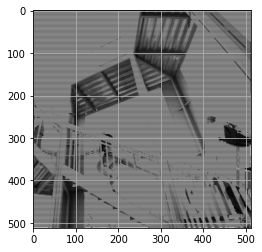

In [27]:
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution += (img[x-1, y-1] * filter[0, 0])
        convolution += (img[x, y-1] * filter[1, 0])
        convolution += (img[x+1, y-1] * filter[2, 0])
        convolution += (img[x-1, y] * filter[0, 1]) 
        convolution += (img[x, y] * filter[1, 1]) 
        convolution += (img[x+1, y] * filter[2, 1])
        convolution += (img[x-1, y+1] * filter[0, 2])
        convolution += (img[x, y+1] * filter[1, 2])
        convolution += (img[x+1, y+1] * filter[2, 2])
        convolution *= weight

        if convolution < 0:
            convolution = 0
        elif convolution > 255:
            convolution = 255

        img[x,y] = convolution

plt.grid('off')
plt.imshow(img)
plt.show()    

First filter is highlighting straight lines and sharp edges.
Now we should see what is the effect of pooling. 

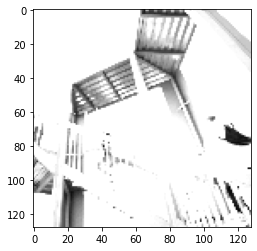

In [32]:
# this will give us 128x128 container
new_img_sizex = int(size_x/4)
new_img_sizey = int(size_y/4)
new_img = np.zeros((new_img_sizex, new_img_sizey))

for x in range(0, size_x, 4):
    for y in range(0, size_y, 4):
        pixels = []
        pixels.append(img[x, y])
        pixels.append(img[x+1, y])
        pixels.append(img[x+2, y])
        pixels.append(img[x+3, y])
        pixels.append(img[x, y+1])
        pixels.append(img[x+1, y+1])
        pixels.append(img[x+2, y+1])
        pixels.append(img[x+3, y+1])
        pixels.append(img[x, y+2])
        pixels.append(img[x+1, y+2])
        pixels.append(img[x+2, y+2])
        pixels.append(img[x+3, y+2])
        pixels.append(img[x, y+3])
        pixels.append(img[x+1, y+3])
        pixels.append(img[x+2, y+3])
        pixels.append(img[x+3, y+3])
        pixels.sort(reverse=True)
        new_img[int(x/4), int(y/4)] = pixels[0]

plt.grid(False)
plt.gray()
plt.imshow(new_img)
plt.show()